In [49]:
# !pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test sets
from sklearn.feature_extraction.text import CountVectorizer # for converting text data into numerical feature vectors
from sklearn.naive_bayes import MultinomialNB # for training a Naive Bayes model
from sklearn.metrics import accuracy_score # for measuring the accuracy of the model

# New Section

In [50]:
data = pd.read_csv("spam.csv", encoding = "latin-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
# Selecting the columns v2 and v1 from the dataset
data = data[["v2", "v1"]]

In [53]:
# rename columns
data = data.rename(columns={"v1":"label", "v2":"text"})

In [55]:
data.

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [56]:
# split the dataset into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=1)

In [57]:
# convert the text data into numerical feature vector
vectorizer = CountVectorizer()

In [58]:
# fit the model and transform the data
X_train_counts = vectorizer.fit_transform(X_train)

In [59]:
# train the Naive Bayes Model
clf=MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [ ]:
# Test the model and create feature vectuor for the test set.
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# Predict the output for test set
y_pred = clf.predict(X_test_counts)

In [ ]:
# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9847533632286996


# # Example 2: Weather Play Decsion

In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [77]:
dataset = pd.DataFrame({'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
                       'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
                       'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
                       'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']})

In [78]:
# Encode categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(dataset.iloc[:, :-1]).toarray()
y = dataset.iloc[:, -1].values


In [85]:
# Encode categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(dataset.iloc[:, :-1])
y = dataset.iloc[:, -1].values


In [86]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [87]:
# train the Naive Bayes Model
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [88]:
# Predict the output for test set
y_pred = clf.predict(X_test)

ValueError: X has 10 features, but MultinomialNB is expecting 7774 features as input.

In [ ]:
# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
#Accepting new data from user
outlook=input("Enter outlook (Sunny/Overcast/Rainy): ")
temperature=input("Enter temperature (Hot/Mild/Cold): ")
humidity=input("Enter humidity (High/Normal): ")
wind=input("Enter wind (Weak/Strong): ")

Enter outlook (Sunny/Overcast/Rainy): Sunny
Enter temperature (Hot/Mild/Cold): Hot
Enter humidity (High/Normal): High
Enter wind (Weak/Strong): Weak


In [ ]:
#Encoding new data
new_data=[[outlook, temperature, humidity, wind]]
new_data=encoder.transform(new_data).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
#Predicting whether to play or not
prediction=nb.predict(new_data)
print("Prediction:",prediction[0])

Prediction: No


In [ ]:
#Calculating the probabilites of playing or not playing
probabilities=nb.predict_proba(new_data)
print("Probability of playing:",probabilities[0][1])
print("Probability of not playing:",probabilities[0][0])

Probability of playing: 0.326557599116279
Probability of not playing: 0.6734424008837216


In [ ]:
#Deciding based on the probability of playing or not
if probabilities[0][1] > probabilities[0][0]:
  print("Decision : Play")
else :
  print("Decision : Do not play")

Decision : Do not play



# Build and Implementing Decsion tree classifyer for Categorical Data


Use data set available:  "Wholesale customers Data Set" which is taken from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)
The dataset consists of the following fields:

Channel: This field represents the type of customer, either 'Hotel/Restaurant/Cafe' (HORECA) or 'Retail' customers.

Region: This field represents the region where the customer is located.

Fresh: This field denotes the annual spending on fresh products.

Milk: This field denotes the annual spending on milk products.

Grocery: This field denotes the annual spending on grocery products

Frozen: This field denotes the annual spending on frozen products.

Detergents_Paper: This field denotes the annual spending on detergents and paper products.

Delicatessen: This field denotes the annual spending on delicatessen products.
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [ ]:
# Split the dataset into features and target
X = data.drop(['Channel'], axis=1)
y = data['Channel']

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Train decision tree models using ID3, C4.5 and C5.0 algorithms
clf1 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
clf2 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', class_weight='balanced')
clf3 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

In [ ]:
# fit the classifyer model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Test the models on the test set
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [ ]:
# Print the accuracy of the models
print("Accuracy of ID3:", accuracy_score(y_test, y_pred1))
print("Accuracy of C4.5:", accuracy_score(y_test, y_pred2))
print("Accuracy of C5.0:", accuracy_score(y_test, y_pred3))

Accuracy of ID3: 0.8977272727272727
Accuracy of C4.5: 0.875
Accuracy of C5.0: 0.9204545454545454


# # Practical :  Building Random Forest Model for classification as well as regression Problem.

In [ ]:
import pandas as pd                                 # import pandas library
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier class from sklearn
from sklearn.model_selection import train_test_split # import train_test_split function from sklearn
from sklearn.metrics import accuracy_score         # import accuracy_score function from sklearn

In [ ]:
# loads the data from a CSV file.
# In this case, it loads data on customer spending from the UCI Machine Learning Repository.
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [ ]:
# Split the dataset into features and target
X = data.drop(['Channel'], axis=1)
y = data['Channel']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
## Train a random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Test the model on the test set
y_pred = clf.predict(X_test)

In [ ]:
#Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8863636363636364


# # Practical : Adaptive boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Importing the rest of the libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
#Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine. target)

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Step 3 – Split the data into training and testing sets

#Split the dataset into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=23)

In [ ]:
#Step 4 – Build a Decision Tree Stump Model and get its Accuracy Score
#Train a Decision Tree Classifier
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini', random_state=23)
dtclf.fit(X_train,y_train)
dtclf_pred = dtclf.predict(X_test)

dtclf_acc = round(accuracy_score(y_test,dtclf_pred),3)
print(f"Decision Tree Classifier Test Accuracy Score: ", dtclf_acc)


Decision Tree Classifier Test Accuracy Score:  0.648


In [ ]:
#Step 5 – The performance is quite poor. So Build an AdaBoost Classifier and get its Accuracy Score
#AdaBoost Classifier using Decision Tree as base learner
adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=40,
                            learning_rate=0.5,
                            random_state=23)
adaclf.fit(X_train,y_train)
adaclf_pred = adaclf.predict(X_test)

adaclf_acc = round(accuracy_score(y_test,adaclf_pred),3)
print(f"Decision Tree AdaBoost Model test Accuracy score:",adaclf_acc)

Decision Tree AdaBoost Model test Accuracy score: 0.963


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#Practical: # Build SVM model using at least two kernels and compare their results.

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [ ]:
# Split the dataset into features and target
X = data.drop(['Channel'], axis=1) # select feature variables
y = data['Channel']               # select target variable
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create a SVM classifier with linear kernel
clf_linear = svm.SVC(kernel='linear')

# Train the classifier
clf_linear.fit(X_train, y_train)

# Test the classifier on the test set
y_pred_linear = clf_linear.predict(X_test)

# Print the accuracy of the classifier with linear kernel
print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_linear))

Accuracy (Linear Kernel): 0.8181818181818182


In [ ]:
# Create a SVM classifier with radial basis function (RBF) kernel
clf_rbf = svm.SVC(kernel='rbf')
# Train the classifier
clf_rbf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred_rbf = clf_rbf.predict(X_test)

# Print the accuracy of the classifier with RBF kernel
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))

Accuracy (RBF Kernel): 0.8863636363636364


# New Section

# p6 Adaboost

In [5]:
import pandas as pd
import numpy as np
# !pip install mlxtend

In [7]:
df = pd.DataFrame()

In [8]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

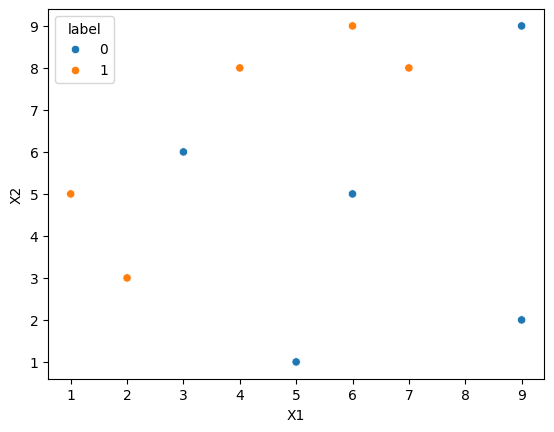

In [12]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [14]:
df.shape

(10, 4)

In [10]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1) # create decsion tree classifieer with decsion stump (max dept=1)

In [20]:
# extract X and y
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [37]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

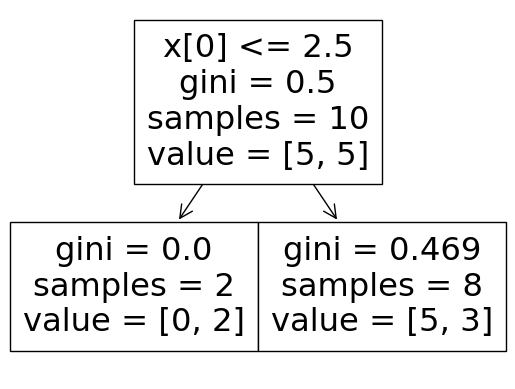

In [24]:
from sklearn.tree import plot_tree
plot_tree(dt1)

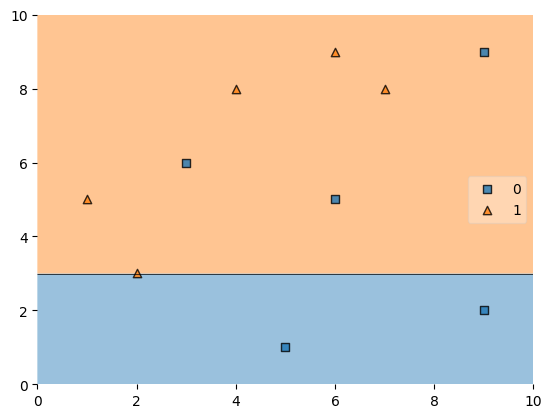

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=dt1, legend=5)
df['y_pred'] = dt1.predict(X)

In [43]:
df
# function to compute the model weight
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))


In [41]:
#Calculate the weight of the first model based on its error rate
alpha1 = calculate_model_weight(0.3)  # 3 misclassification weigts (in this case 3 misclassification)
alpha1

0.42364893019360184

In [44]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [17]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [18]:
# the sum of the update may be less then 1
df['updated_weights'].sum()
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df
df['nomalized_weights'].sum()

1.0

In [19]:
# Now we will create the range
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
# see the range
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [20]:
# we will use random number generator
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']: # check the range and get the index
        indices.append(index)
  return indices

In [21]:
index_values = create_new_dataset(df)

In [22]:
index_values
# create new dataframe from old dataframe with the rows selected above and the respective colums.
second_df = df.iloc[index_values,[0,1,2,3]]
second_df
# make second decsion tree
dt2 = DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

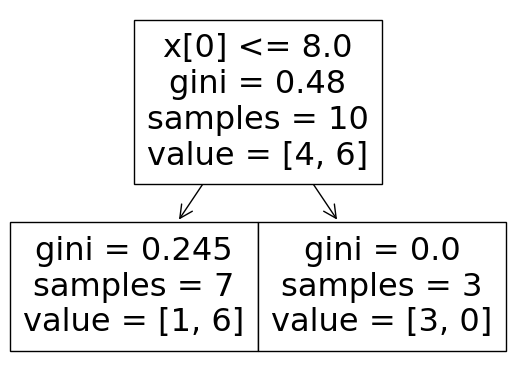

In [24]:
# get the features and outputs
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
# train the decsion tree on the new data
dt2.fit(X,y)
plot_tree(dt2)

<Axes: >

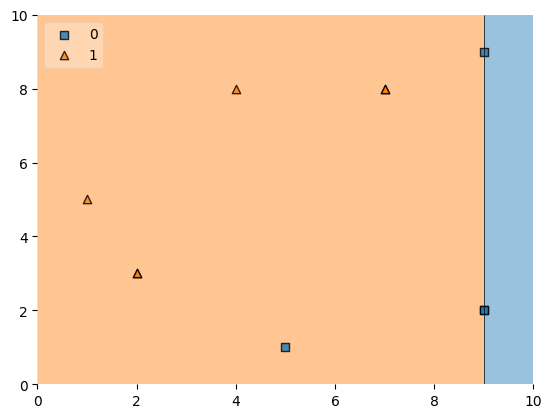

In [25]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [26]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
9,9,2,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
1,2,3,1,0.1,1
4,5,1,0,0.1,1


In [27]:
alpha2 = calculate_model_weight(0.1) # note when there is no misclassification then error may be zero. then it will be problem. then you can add a very small number to overcome this proble. in scikit it is solved.

In [28]:
# Rajesh Maurya8:58 AM
alpha2

1.0986122886681098

In [ ]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
    
   if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
